In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
renewal = pd.read_csv('../Data/renewal_new.csv', index_col = 0)
livelihood = pd.read_csv('../Data/basic_livelihood.csv', index_col = 0)
pop = pd.read_csv('../Data/Seoul_population.csv', index_col = 0)

In [5]:
renewal

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,정비구역명칭,...,60미만건설세대수,60이상85이하건설세대수,85초과건설세대수,건축계획비고,위치도,조감도,배치도,법정동변경,행정법정,0.1
0,,,,,,,,,,,,,,,,,,,,,
강남구개포1동,11680-900000942,강남구,개포동,재건축,추진위원회,개포우성6차아파트 재건축사업,개포동 658-1,조합설립추진위원회승인,운영,개포우성6차아파트 재건축사업,...,120.0,226.0,49.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,강남구개포동,NaN,강남구개포1동
강남구개포2동,11680-900000942,강남구,개포동,재건축,추진위원회,개포우성6차아파트 재건축사업,개포동 658-1,조합설립추진위원회승인,운영,개포우성6차아파트 재건축사업,...,120.0,226.0,49.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,강남구개포동,NaN,강남구개포2동
강남구개포3동,11680-900000942,강남구,개포동,재건축,추진위원회,개포우성6차아파트 재건축사업,개포동 658-1,조합설립추진위원회승인,운영,개포우성6차아파트 재건축사업,...,120.0,226.0,49.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,강남구개포동,NaN,강남구개포3동
강남구개포4동,11680-900000942,강남구,개포동,재건축,추진위원회,개포우성6차아파트 재건축사업,개포동 658-1,조합설립추진위원회승인,운영,개포우성6차아파트 재건축사업,...,120.0,226.0,49.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,강남구개포동,NaN,강남구개포4동
강남구개포1동,11680-900000688,강남구,개포동,재건축,조합,"개포주공6,7단지아파트 재건축정비사업조합",개포동 185,조합설립인가,운영,개포주공6.7단지아파트 재건축정비구역,...,654.0,808.0,1086.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,강남구개포동,NaN,강남구개포1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
중랑구중화제2동,11260-900000899,중랑구,중화동,가로주택정비,조합,중화역 2의1구역 가로주택정비사업,중화동 329-38,조합설립인가,운영,중화역2의1구역 가로주택정비사업조합,...,201.0,26.0,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,중랑구중화동,NaN,중랑구중화제2동
중랑구중화제1동,11260-900000900,중랑구,중화동,가로주택정비,조합,중화역 2의2구역 가로주택정비사업,중화동 329-30,조합설립인가,운영,중화역2의2구역 가로주택정비사업,...,206.0,29.0,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,중랑구중화동,NaN,중랑구중화제1동
중랑구중화제2동,11260-900000900,중랑구,중화동,가로주택정비,조합,중화역 2의2구역 가로주택정비사업,중화동 329-30,조합설립인가,운영,중화역2의2구역 가로주택정비사업,...,206.0,29.0,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,중랑구중화동,NaN,중랑구중화제2동


In [94]:
livelihood

,ancestry,sum_bsc_lklhood,gen_bsc_lklhood,gen_pop,con_bsc_anc,pop_bsc,bsc_lvlhood_ratio
new_index,,,,,,,
종로구소계,4215,5559,3615,4221,419,593,0.076668
종로구사직동,112,125,105,117,7,8,0.027352
종로구삼청동,38,45,29,31,5,10,0.039929
종로구부암동,135,174,117,144,13,25,0.042151
종로구평창동,107,144,91,112,13,29,0.019975
...,...,...,...,...,...,...,...
강동구천호2동,1510,2002,1267,1623,210,338,0.113828
강동구길동,1241,1637,1015,1285,205,329,0.074541
강동구상일1동,292,396,248,313,40,78,0.029079


In [8]:
pop

,ancestry,population,korean,foreigner,density,foreign_rate
new_index,,,,,,
소계소계,4469158,9659322,9414093,245229,2,0.025388
종로구소계,72507,151349,140397,10952,2,0.072363
종로구사직동,4570,9362,9089,273,2,0.029160
종로구삼청동,1127,2576,2277,299,2,0.116071
종로구부암동,4128,9377,9112,265,2,0.028261
...,...,...,...,...,...,...
강동구둔촌2동,10329,24169,24058,111,2,0.004593
강동구길동,21961,45142,44808,334,2,0.007399
강동구강일동,13109,32996,32811,185,3,0.005607


In [97]:
print(list(pop.index))

['소계소계', '종로구소계', '종로구사직동', '종로구삼청동', '종로구부암동', '종로구평창동', '종로구무악동', '종로구교남동', '종로구가회동', '종로구종로1.2.3.4가동', '종로구종로5.6가동', '종로구이화동', '종로구창신1동', '종로구창신2동', '종로구창신3동', '종로구숭인1동', '종로구숭인2동', '종로구청운효자동', '종로구혜화동', '중구소계', '중구소공동', '중구회현동', '중구명동', '중구필동', '중구장충동', '중구광희동', '중구을지로동', '중구신당5동', '중구황학동', '중구중림동', '중구신당동', '중구다산동', '중구약수동', '중구청구동', '중구동화동', '용산구소계', '용산구후암동', '용산구용산2가동', '용산구남영동', '용산구원효로1동', '용산구원효로2동', '용산구효창동', '용산구용문동', '용산구이촌1동', '용산구이촌2동', '용산구이태원1동', '용산구이태원2동', '용산구서빙고동', '용산구보광동', '용산구청파동', '용산구한강로동', '용산구한남동', '성동구소계', '성동구왕십리2동', '성동구마장동', '성동구사근동', '성동구행당1동', '성동구행당2동', '성동구응봉동', '성동구금호1가동', '성동구금호4가동', '성동구성수1가1동', '성동구성수1가2동', '성동구성수2가1동', '성동구성수2가3동', '성동구송정동', '성동구용답동', '성동구왕십리도선동', '성동구금호2.3가동', '성동구옥수동', '광진구소계', '광진구화양동', '광진구군자동', '광진구중곡1동', '광진구중곡2동', '광진구중곡3동', '광진구중곡4동', '광진구능동', '광진구구의1동', '광진구구의2동', '광진구구의3동', '광진구광장동', '광진구자양1동', '광진구자양2동', '광진구자양3동', '광진구자양4동', '동대문구소계', '동대문구전농1동', '동대문구전농2동', '동대문구답십리1동', '동대문구답십리2동', '동대문구장안1동', '동대문구장안2동', '동대문구회기동

In [147]:
income = np.log(pd.read_csv('../Data/income_new.csv', index_col = 0))
income.index = income.index.str.replace('·','.')

In [171]:
elder = pd.read_csv('../Data/elder_ratio.csv', index_col = 0)

### Make Feature Matrix

In [172]:
matrix = pd.DataFrame()
matrix = pd.concat([pop[['population','density','foreign_rate']],
                    livelihood['bsc_lvlhood_ratio'],
                    income, elder], axis = 1)

In [173]:
matrix

,population,density,foreign_rate,bsc_lvlhood_ratio,ave_income_amt,elder_ratio
소계소계,9659322.0,2.0,0.025388,NaN,NaN,NaN
종로구소계,151349.0,2.0,0.072363,0.076668,NaN,NaN
종로구사직동,9362.0,2.0,0.029160,0.027352,8.753692,0.203605
종로구삼청동,2576.0,2.0,0.116071,0.039929,8.612424,0.265542
종로구부암동,9377.0,2.0,0.028261,0.042151,8.567173,0.202824
...,...,...,...,...,...,...
관악구,NaN,NaN,NaN,NaN,NaN,0.173124
서초구,NaN,NaN,NaN,NaN,NaN,0.159051
강남구,NaN,NaN,NaN,NaN,NaN,0.157343
송파구,NaN,NaN,NaN,NaN,NaN,0.163712


종로구 종로 1.2.3.4가동, 종로구 종로 5.6가동, 성동구 금호 2.3가동, 중랑구면목3.8동, 노원구 중계 2.3동, 노원구 상계 3.4동, 노원구 상계 6.7동, 송파구 잠실 4동, 송파구 잠실 6동, 강동구 상일 1동, 강동구 상일 2동

In [174]:
matrix = matrix.dropna()
matrix

,population,density,foreign_rate,bsc_lvlhood_ratio,ave_income_amt,elder_ratio
종로구사직동,9362.0,2.0,0.029160,0.027352,8.753692,0.203605
종로구삼청동,2576.0,2.0,0.116071,0.039929,8.612424,0.265542
종로구부암동,9377.0,2.0,0.028261,0.042151,8.567173,0.202824
종로구평창동,17658.0,2.0,0.010307,0.019975,9.026260,0.205252
종로구무악동,8015.0,3.0,0.003868,0.068439,8.381916,0.187718
...,...,...,...,...,...,...
강동구성내3동,22882.0,2.0,0.014116,0.066591,8.701282,0.189747
강동구둔촌1동,70.0,2.0,0.128571,0.026316,8.658970,0.161290
강동구둔촌2동,24169.0,2.0,0.004593,0.051893,8.658970,0.184433
강동구길동,45142.0,2.0,0.007399,0.074541,8.771733,0.198042


In [175]:
unique = renewal[['법정동변경','0.1']]['0.1'].unique()

In [176]:
unique = set(matrix.index).intersection(unique)

In [177]:
unique

{'강남구개포1동',
 '강남구개포2동',
 '강남구개포4동',
 '강남구논현1동',
 '강남구논현2동',
 '강남구대치1동',
 '강남구대치2동',
 '강남구대치4동',
 '강남구도곡1동',
 '강남구도곡2동',
 '강남구삼성1동',
 '강남구삼성2동',
 '강남구신사동',
 '강남구압구정동',
 '강남구역삼1동',
 '강남구역삼2동',
 '강남구일원1동',
 '강남구일원본동',
 '강남구청담동',
 '강동구길동',
 '강북구미아동',
 '강북구번1동',
 '강북구번2동',
 '강북구번3동',
 '강북구삼각산동',
 '강북구삼양동',
 '강북구송중동',
 '강북구송천동',
 '강북구수유1동',
 '강북구수유2동',
 '강북구수유3동',
 '강북구우이동',
 '강북구인수동',
 '강서구공항동',
 '강서구염창동',
 '강서구우장산동',
 '강서구화곡본동',
 '관악구낙성대동',
 '관악구난곡동',
 '관악구난향동',
 '관악구남현동',
 '관악구대학동',
 '관악구미성동',
 '관악구보라매동',
 '관악구삼성동',
 '관악구서림동',
 '관악구서원동',
 '관악구성현동',
 '관악구신림동',
 '관악구신사동',
 '관악구신원동',
 '관악구은천동',
 '관악구인헌동',
 '관악구조원동',
 '관악구중앙동',
 '관악구청룡동',
 '관악구청림동',
 '관악구행운동',
 '광진구광장동',
 '광진구화양동',
 '구로구가리봉동',
 '구로구수궁동',
 '금천구가산동',
 '노원구공릉1동',
 '노원구공릉2동',
 '노원구상계10동',
 '노원구상계1동',
 '노원구상계2동',
 '노원구상계3.4동',
 '노원구상계5동',
 '노원구상계6.7동',
 '노원구상계8동',
 '노원구상계9동',
 '노원구월계1동',
 '노원구월계2동',
 '노원구월계3동',
 '노원구중계4동',
 '동대문구용신동',
 '동대문구제기동',
 '동대문구청량리동',
 '동대문구회기동',
 '동작구대방동',
 '동작구흑석동',
 '마포구공덕동',
 '마포구대흥동',
 '마포구도화동',
 '마포구

In [178]:
matrix.loc[list(unique)]

,population,density,foreign_rate,bsc_lvlhood_ratio,ave_income_amt,elder_ratio
강동구길동,45142.0,2.0,0.007399,0.074541,8.771733,0.198042
강북구수유3동,23781.0,2.0,0.034692,0.127524,8.204620,0.215448
송파구가락2동,31507.0,3.0,0.005713,0.046651,8.893148,0.150387
관악구미성동,30465.0,2.0,0.018218,0.093733,8.520599,0.210210
양천구신월5동,14286.0,2.0,0.008820,0.119675,8.201060,0.191901
...,...,...,...,...,...,...
송파구문정1동,19785.0,2.0,0.007935,0.047394,8.836127,0.169137
강북구번1동,18455.0,2.0,0.029911,0.117755,8.199766,0.215003
송파구잠실2동,35034.0,3.0,0.002969,0.002853,9.244339,0.114272
송파구거여2동,23805.0,2.0,0.003655,0.079513,8.594965,0.190690


In [179]:
matrix['label'] = 0
matrix.loc[list(unique), 'label'] = 1

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_10599/1127350991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix['label'] = 0


In [180]:
matrix

,population,density,foreign_rate,bsc_lvlhood_ratio,ave_income_amt,elder_ratio,label
종로구사직동,9362.0,2.0,0.029160,0.027352,8.753692,0.203605,1
종로구삼청동,2576.0,2.0,0.116071,0.039929,8.612424,0.265542,0
종로구부암동,9377.0,2.0,0.028261,0.042151,8.567173,0.202824,1
종로구평창동,17658.0,2.0,0.010307,0.019975,9.026260,0.205252,0
종로구무악동,8015.0,3.0,0.003868,0.068439,8.381916,0.187718,1
...,...,...,...,...,...,...,...
강동구성내3동,22882.0,2.0,0.014116,0.066591,8.701282,0.189747,0
강동구둔촌1동,70.0,2.0,0.128571,0.026316,8.658970,0.161290,0
강동구둔촌2동,24169.0,2.0,0.004593,0.051893,8.658970,0.184433,0
강동구길동,45142.0,2.0,0.007399,0.074541,8.771733,0.198042,1


#### Modeling

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(matrix.iloc[:,:-1], matrix.iloc[:,-1], test_size = 0.2, random_state = 42)

In [213]:
clf = RandomForestClassifier(n_estimators = 1000, 
                             random_state = 42,
                             class_weight = 'balanced_subsample',
                             ccp_alpha = 0.02,
                             criterion = 'entropy')
fit = clf.fit(X_train, y_train)

In [214]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [215]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        51
           1       0.74      0.70      0.72        33

    accuracy                           0.79        84
   macro avg       0.78      0.77      0.77        84
weighted avg       0.78      0.79      0.78        84


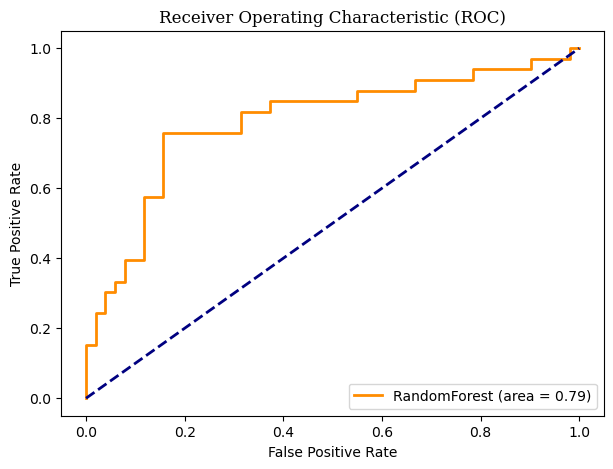

In [216]:
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'RandomForest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = "lower right")
plt.show()

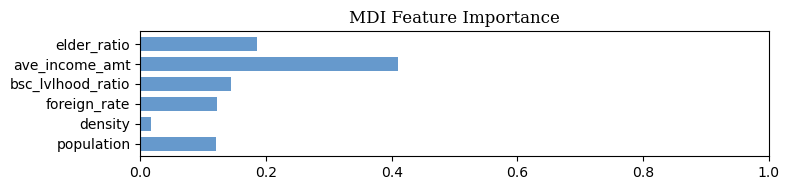

In [206]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                     'Importance': fit.feature_importances_})
plt.figure(figsize = (8,2))
plt.barh(feature_importance_df['Feature'], 
         feature_importance_df['Importance'], 
         color = '#6699CC',
         height = 0.7)
plt.xlim([0, 1])
plt.title('MDI Feature Importance', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()

In [217]:
# matrix.to_csv('../Data/feature_matrix.csv')

#### MultiCollinearity Handling

Text(0, 0.5, 'Average Income')

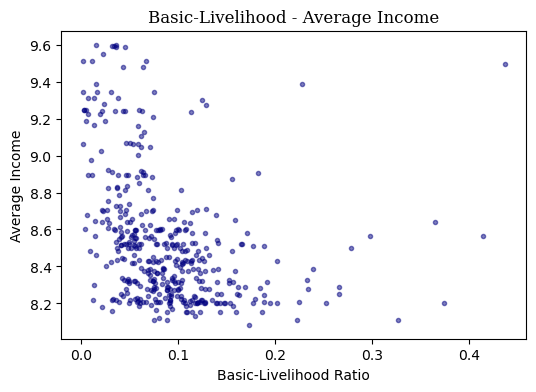

In [164]:
plt.figure(figsize = (6, 4))
plt.scatter(matrix.iloc[:,[-3]], matrix.iloc[:,[-2]], marker = '.', color = 'navy', alpha = 0.5)
plt.title('Basic-Livelihood - Average Income', fontsize = 12, fontfamily = 'Serif')
plt.xlabel('Basic-Livelihood Ratio')
plt.ylabel('Average Income')

In [165]:
import statsmodels.api as sm

X = sm.add_constant(matrix.iloc[:,[-3]])
model = sm.OLS(matrix.iloc[:,[-2]], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         ave_income_amt   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     53.47
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.35e-12
Time:                        17:25:06   Log-Likelihood:                -128.04
No. Observations:                 421   AIC:                             260.1
Df Residuals:                     419   BIC:                             268.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.7100      0.02

In [166]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(matrix.iloc[:,[-3, -2]])

print(f"Chi Square Stats: {chi2}")
print(f"p-value: {p}")
print(f"degree of Freedom: {dof}")

Chi Square Stats: 17.396985046071322
p-value: 1.0
degree of Freedom: 420
